In [1]:
import pandas as pd
from sklearn.cluster import KMeans

# Read the CSV file into a pandas DataFrame
data = pd.read_csv('trips.csv')

# Select the numerical columns for clustering
numerical_data = data[['budget', 'rating']]

# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(numerical_data)

# Assign cluster labels to each data point
cluster_labels = kmeans.labels_

# Add cluster labels to the original DataFrame
data['cluster'] = cluster_labels

# Print the data with cluster labels
print(data)


    trip_id                 trip_name  category  budget  rating    location  \
0         1          Taste of Jakarta  Culinary  743432     3.5     Jakarta   
1         2       Historical Heritage   History  215340     4.2  Yogyakarta   
2         3  Local Culture Experience   Culture  552740     4.6    Surabaya   
3         4          Iconic Landmarks  Landmark  628543     4.8     Bandung   
4         5         Culinary Delights  Culinary  325931     3.1      Malang   
..      ...                       ...       ...     ...     ...         ...   
95       96        Landmark Discovery  Landmark  641259     4.7   Surakarta   
96       97     Flavors of Yogyakarta  Culinary  324179     3.3  Yogyakarta   
97       98    Historical Exploration   History  693825     4.6     Jakarta   
98       99      Cultural Discoveries   Culture  522351     4.5    Surabaya   
99      100     Architectural Marvels  Landmark  482361     4.2     Bandung   

    cluster  
0         2  
1         0  
2        

d:\python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


C:\Users\HP\AppData\Local\Temp\ipykernel_21752\2145063871.py:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  ax1.plot(k_values, distortion_scores, 'bo-', color=color)
C:\Users\HP\AppData\Local\Temp\ipykernel_21752\2145063871.py:36: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  ax2.plot(k_values, fit_times, 'bo-', color=color)


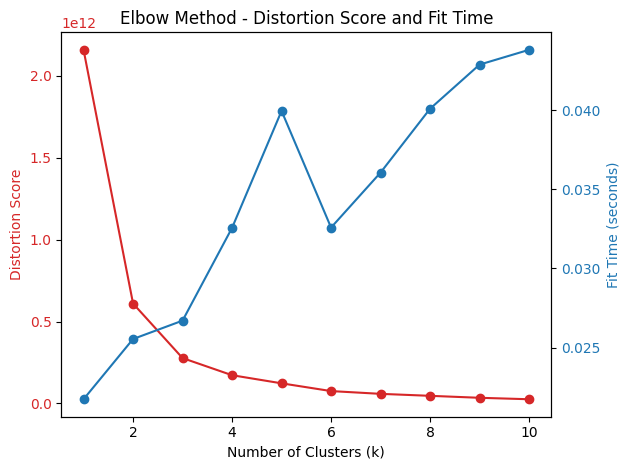

In [81]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import time

# Read the CSV file into a pandas DataFrame
data = pd.read_csv('trips.csv')

# Select the numerical columns for clustering
numerical_data = data[['budget', 'rating']]

# Perform k-means clustering for different values of k
k_values = range(1, 11)  # Try k from 1 to 10
distortion_scores = []  # Distortion score
fit_times = []  # Fit time

for k in k_values:
    start_time = time.time()
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(numerical_data)
    distortion_scores.append(kmeans.inertia_)
    fit_times.append(time.time() - start_time)

# Plot the distortion score and fit time against the number of clusters
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Distortion Score', color=color)
ax1.plot(k_values, distortion_scores, 'bo-', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Fit Time (seconds)', color=color)
ax2.plot(k_values, fit_times, 'bo-', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Elbow Method - Distortion Score and Fit Time')
fig.tight_layout()
plt.show()


d:\python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


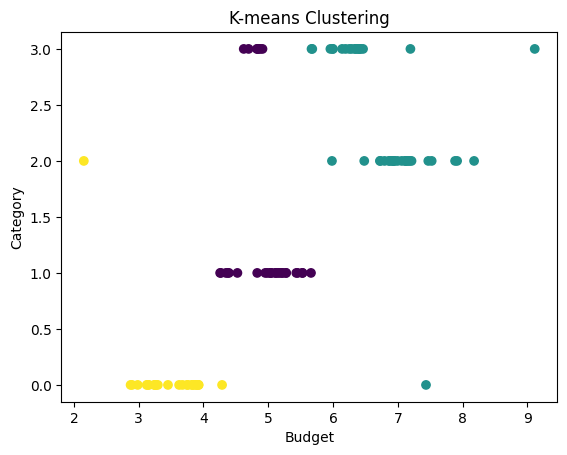

In [7]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
data = pd.read_csv('trips.csv')
data['budget'] = data['budget'] / 100000

# Select the columns for clustering
selected_columns = ['trip_name', 'category', 'location', 'budget', 'rating']

# Perform label encoding for the 'category' column
label_encoder = LabelEncoder()
data['category'] = label_encoder.fit_transform(data['category'])

# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data[['budget', 'category']])

# Assign cluster labels to each data point
cluster_labels = kmeans.labels_

# Add cluster labels to the original DataFrame
data['cluster'] = cluster_labels

# Create a scatter plot to visualize the clustering results
plt.scatter(data['budget'], data['category'], c=data['cluster'], cmap='viridis')
plt.xlabel('Budget')
plt.ylabel('Category')
plt.title('K-means Clustering')
plt.show()


In [8]:
# New data for testing
new_data = pd.DataFrame({
    'category': ['Landmark'],
    'budget': [424523]
})
new_data['budget'] = new_data['budget'] / 100000

# Perform label encoding for the new data
new_data['category'] = label_encoder.transform(new_data['category'])

# Predict the cluster label for the new data
new_data['cluster'] = kmeans.predict(new_data[['budget', 'category']])

# Print the cluster label for the new data
print('New Data Cluster:', new_data['cluster'].iloc[0])
print(new_data)
# Retrieve the cluster label for the new data
new_data_cluster = new_data['cluster'].iloc[0]

New Data Cluster: 0
   category   budget  cluster
0         3  4.24523        0


In [9]:
# Filter the data based on the predicted cluster label
filtered_data = data[data['cluster'] == new_data_cluster]

# Sort the filtered data based on the Euclidean distance from the new data point
filtered_data['distance'] = ((filtered_data['budget'] - new_data['budget'].iloc[0])**2 + 
                             (filtered_data['category'] - new_data['category'].iloc[0])**2)**0.5
filtered_data = filtered_data.sort_values('distance')

# Top K predictions based on the sorted distances
K = 3
top_K_points = filtered_data.head(K)

# Print the top K closest points
print('\nTop', K, 'Closest Points:')
print(top_K_points)


Top 3 Closest Points:
    trip_id              trip_name  category   budget  rating  location  \
91       92   Archaeological Sites         3  4.62137     4.2   Bandung   
67       68  Architectural Marvels         3  4.69641     4.2  Surabaya   
99      100  Architectural Marvels         3  4.82361     4.2   Bandung   

    cluster  distance  
91        0   0.37614  
67        0   0.45118  
99        0   0.57838  


C:\Users\L E N O V O\AppData\Local\Temp\ipykernel_8188\1988166335.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['distance'] = ((filtered_data['budget'] - new_data['budget'].iloc[0])**2 +


In [7]:
import joblib
# Save the trained K-means model
joblib.dump(kmeans, 'kmeans_model.pkl')

# Save the label encoder
joblib.dump(label_encoder, 'label_encoder.pkl')


['label_encoder.pkl']